# Census Income
## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. 

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. 

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. 

That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

The data frame contains  32560 rows and 15 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This dataset contains 9 object datatype and 6 int64

# Lets check it has a null value present in the dataset or not

In [5]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

we observe here that the data set contains 0 null value.
lets check with the heatmap

<AxesSubplot:>

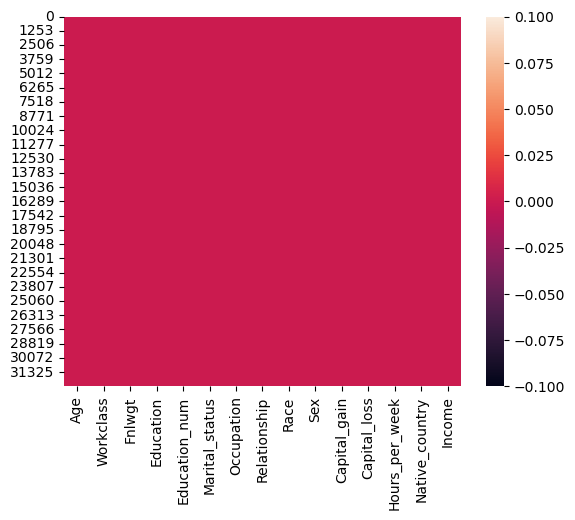

In [6]:
sns.heatmap(df.isnull())

lets chack the unique values present in the Dataset

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n", "*"*100, "\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

 **************************************************************************************************** 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 **************************************************************************************************** 

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

 **************************************************************************************************** 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters    

after Scrolling down we observe that 

1) workclass contains       ? 1836 values.

2) Occumaption contains     ? 1843 values.

3) cpaital gain contain     0 29849 values.

4) capital loss contains    0 31041 values.

5) Native_country contains  ? 583 values

Our Target varibale contains onlt 2 value_counts 
 <=50K 
 >50K


# Lets Analysis each column one by one

# 1) Age

In [8]:
df["Age"].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

Our Age columns have 73 unique value. Lets try to plot a graph.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


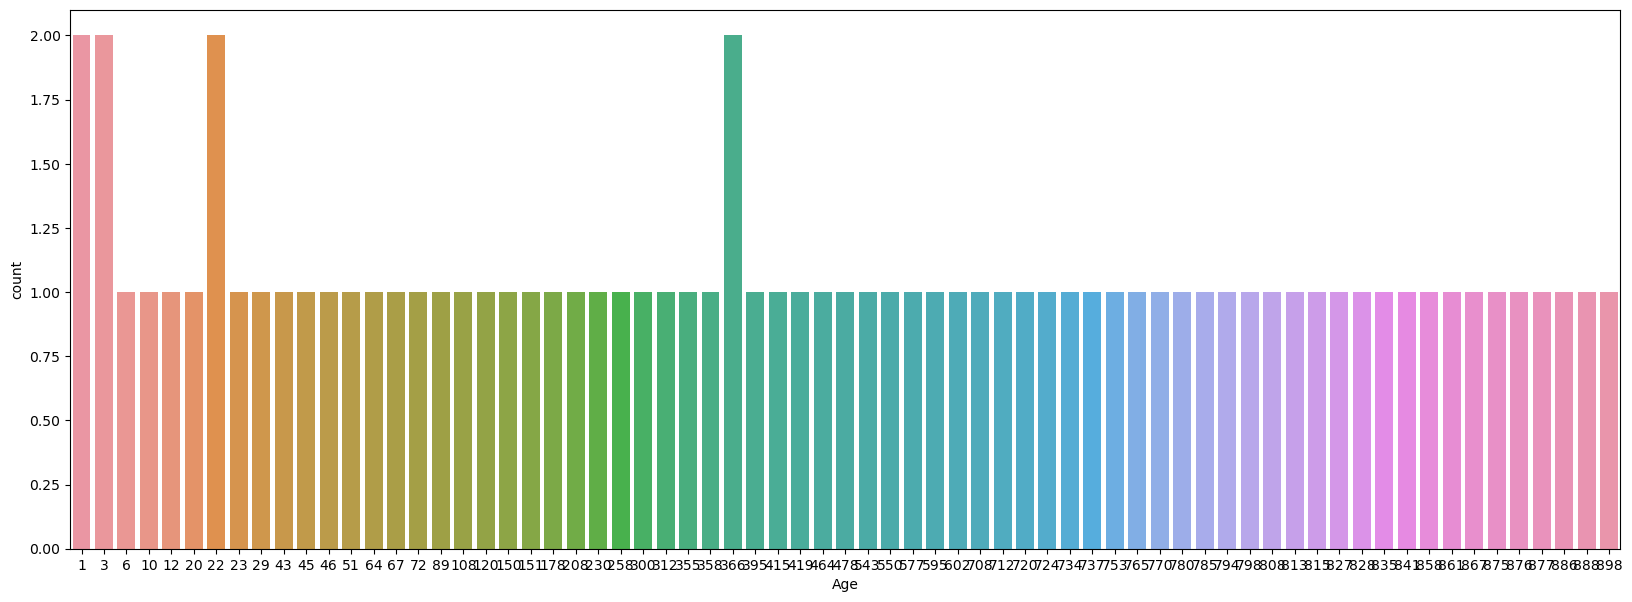

In [9]:
plt.figure(figsize=(20,7))
sns.countplot(df["Age"].value_counts())
plt.show()

The graph dosenot clear any thing. so we could not onclude anything from this.

# 2. Workclass

In [10]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

# here we observe that ? count 1836 and also have the many feature is also in this column. so Lets handle this step by step.

In [11]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [12]:
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
# i done the mistake here.

In [13]:
# lets ? replace this with majority vlaue count that is Privete
df['Workclass'] =df.Workclass.str.replace('?','Private')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13688\3201626359.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Workclass'] =df.Workclass.str.replace('?','Private')


In [14]:
# make a new Dataframe because we have 3Goverment Sector and Private sector
# 1 st of all make the list and then replace with new value
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov' ],'Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc' ],'Pvt-Sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

Pvt-Sector     28189
Govt-Sector     4350
Not-working       21
Name: Workclass, dtype: int64


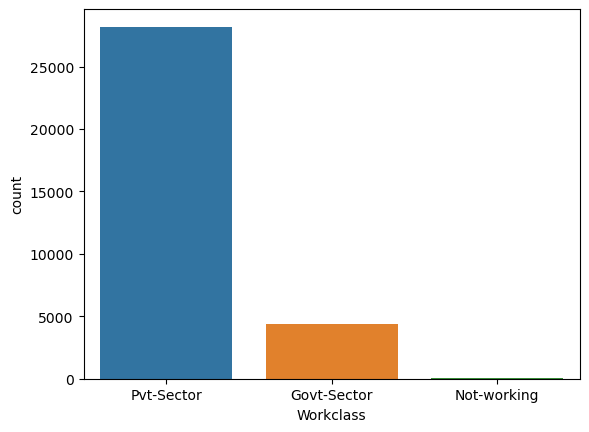

In [15]:
ax = sns.countplot(x='Workclass', data= df)
print(df['Workclass'].value_counts())

Here we clearly observe that most of the pepole working in the private sector followed by the Govt.Sector

# 3 Fnlwgt

In [16]:
df['Fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

# 4.Education

In [17]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

This Also have too many fetaures in the Education columns.

We have to use Feature Engineering here to make our data set small.

In [18]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],' School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],'Secondary-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],'High-School')
df["Education"]=df["Education"].replace([' Bachelors'],' Graduate')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduate')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

Secondary-School    11077
High-School          9740
 Graduate            5354
 School              4253
 Post_Graduate       1723
 PhD                  413
Name: Education, dtype: int64


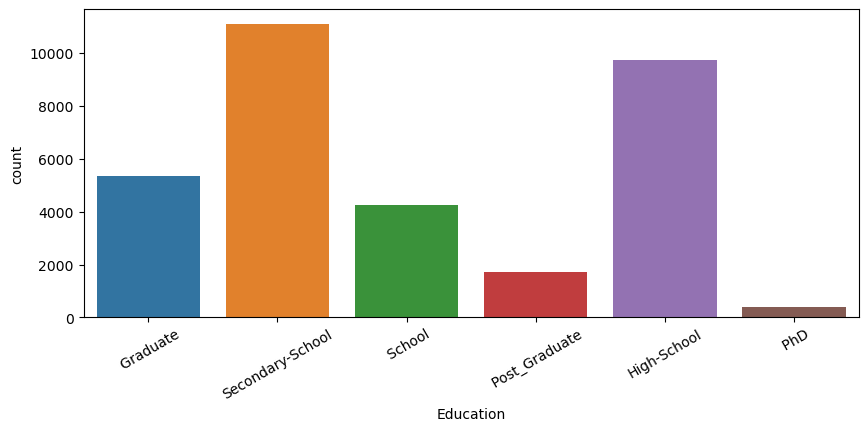

In [19]:
print(df['Education'].value_counts())
plt.figure(figsize=(10,4))
ax = sns.countplot(x='Education', data= df)
plt.xticks(rotation = 30)
plt.show()


Seondary school and HIgh school has more pepole. and Phd level people are very less as per the graph.

# 5.Marital_status

In [20]:
df["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

here we observed that divorced, separated and widowed means they are without partner right now but with the diffrernt meaning.

married spouse absent and marrried af spouse it dosenot have much sense.

lets do Feture enginerring here.And make dataset small.


In [21]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],'Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],'Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],'Others')

Married    14999
Single     10682
Others      6879
Name: Marital_status, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


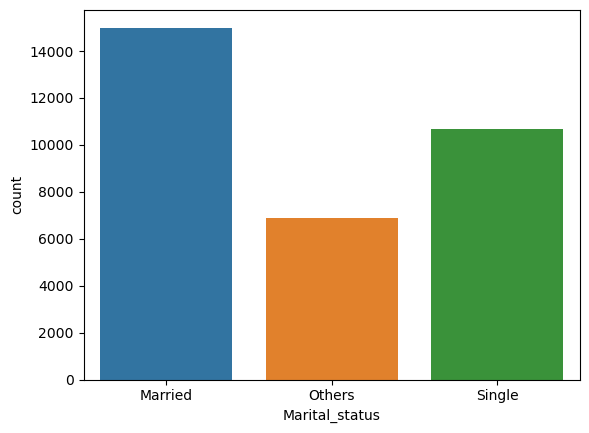

In [22]:
print(df["Marital_status"].value_counts())
sns.countplot(df["Marital_status"])
plt.show()

The people who got married have high count followed by the singles and never married people

# 6.Occupation

In [23]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

here also we find the ?which has 1843 count number. Lets replace this.

In [24]:
df['Occupation'] =df.Occupation.str.replace('?','Prof-speciality')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13688\1684734183.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Occupation'] =df.Occupation.str.replace('?','Prof-speciality')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Prof-speciality      1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


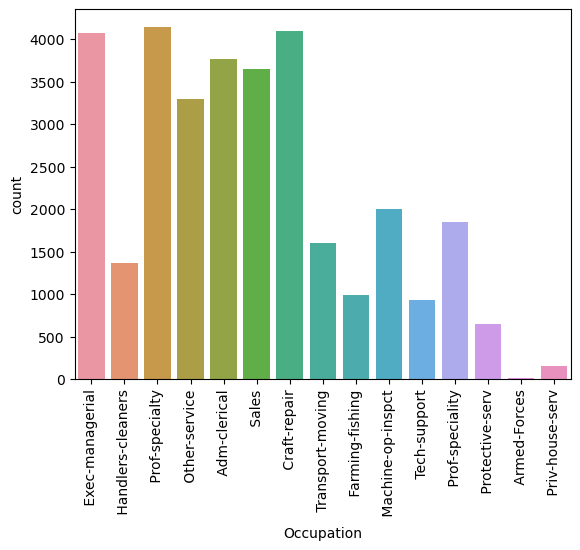

In [25]:
print(df['Occupation'].value_counts())
sns.countplot(df['Occupation'])
plt.xticks(rotation = 90 )
plt.show()

The peole who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.

it showing warning again and again .lets import the warnings.

In [26]:
import warnings
warnings.filterwarnings('ignore')

# 7.Relationship

In [27]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [28]:
df["Relationship"]=df["Relationship"].replace(['Not-in-family'],'Other-relative')

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


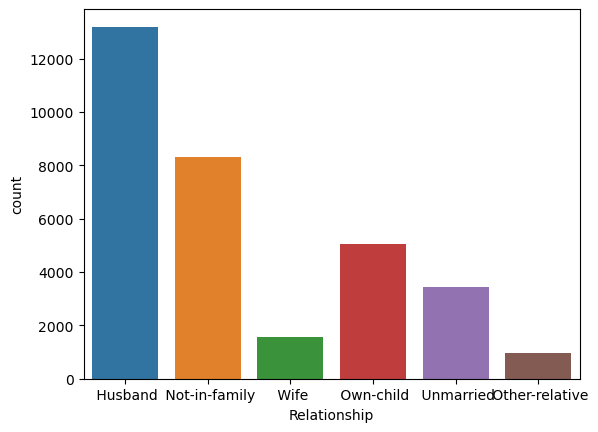

In [29]:
print(df['Relationship'].value_counts())
sns.countplot(df['Relationship'])
plt.show()

# 9 RACE

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

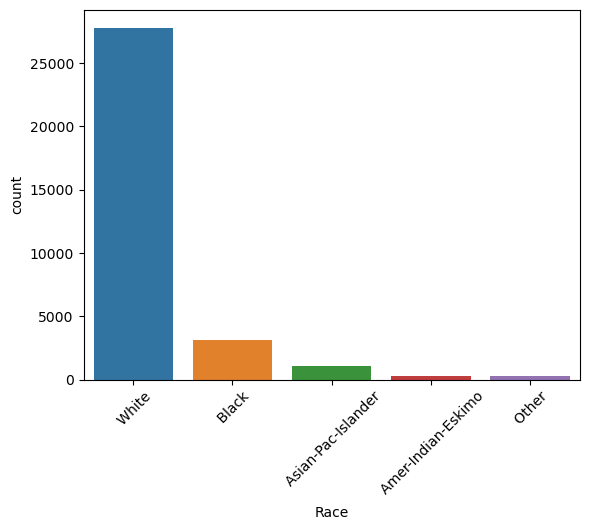

In [30]:
print(df['Race'].value_counts())
sns.countplot(df['Race'])
plt.xticks(rotation = 45)

white pepole are in majority followed by the Black and Asian-pac-islander


# 10 sex

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

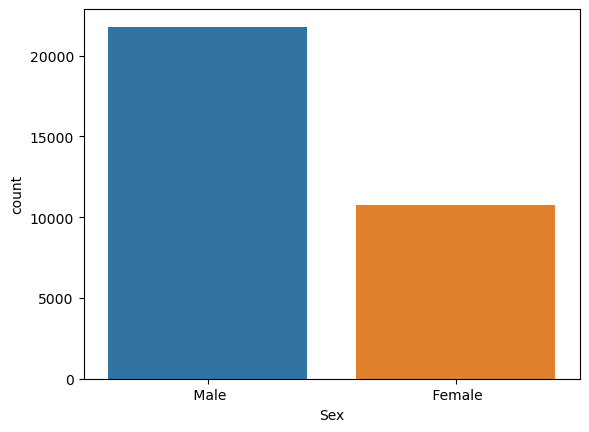

In [31]:
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

MAle has more contribution as compare to Female.

# 11 Capital gain

In [32]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

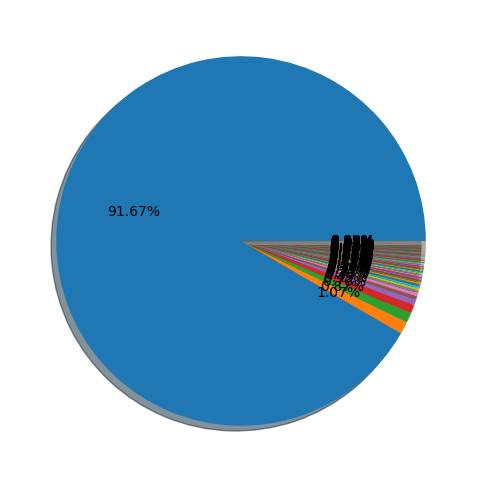

In [33]:

fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Capital_gain'].value_counts(), autopct='%1.2f%%', shadow=True)
plt.show()

This is just for the Anlayis. it shows that 90% of data contaon the value 0. 

And it does not have much sense to keep this column

In [34]:
df.drop('Capital_gain', axis = 1, inplace = True)


# 12 Capital_loss

In [35]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

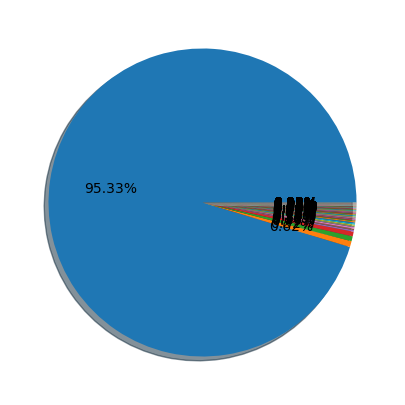

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(df['Capital_loss'].value_counts(), autopct='%1.2f%%', shadow=True)
plt.show()

This is just for the Analysis. it shows that 95% of data contain the value 0.

And it does not have much sense to keep this column

In [37]:
df.drop("Capital_loss",axis=1,inplace=True)

 # 13 Native_country

In [38]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

it contains ? 583 counts.
lets replace it my mode method.

In [39]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

In [40]:
df['Native_country'] =df.Native_country.str.replace('?','United-States')

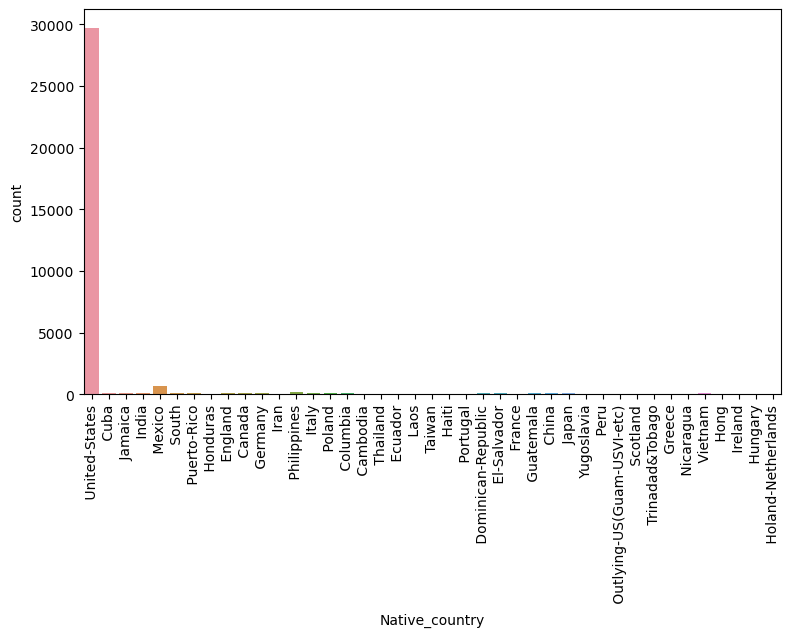

In [41]:
# visualizing the Native country of the people
plt.figure(figsize=(9,5))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The United States country has highest count of around 29k and  maxico has 648 count 

other countries have very less counts.

In [42]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Prof-speciality      1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

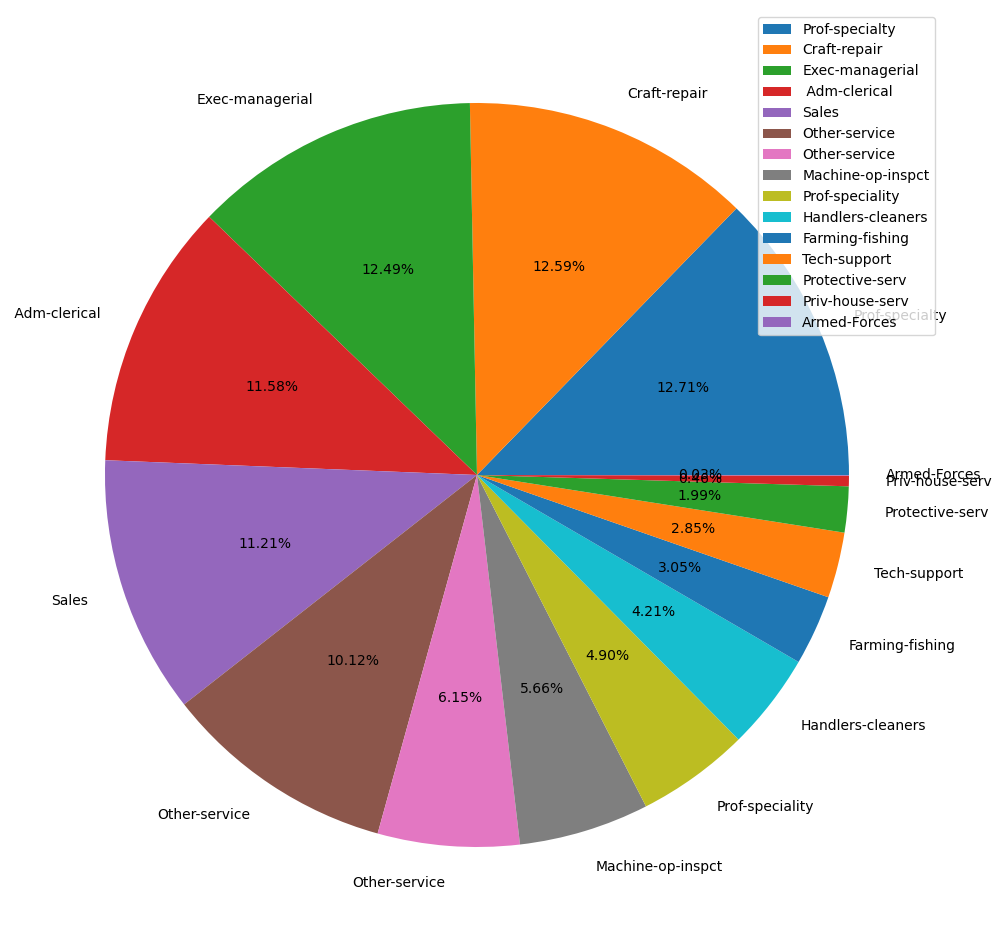

In [43]:
fig, ax = plt.subplots(figsize=(12,115))
labels = 'Prof-specialty','Craft-repair','Exec-managerial',' Adm-clerical','Sales','Other-service','Other-service','Machine-op-inspct','Prof-speciality','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces'

ax.pie(df['Occupation'].value_counts(), labels = labels , autopct='%1.2f%%')
plt.legend(loc= 1)
plt.show()

The graph clearly shows that prof specialist contribue 12.71% followed by craft 12.58%

leas contribution is Armed-Forces and Priv-house-serv > 1% 
 

# 15.Target varibale 'Income'  

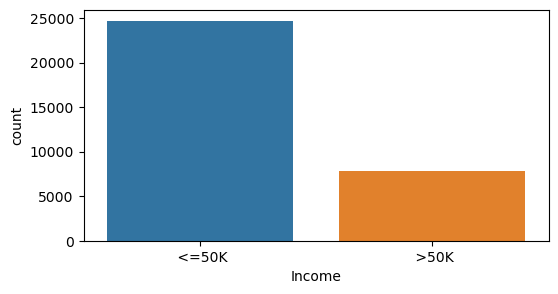

In [44]:
# Visualize the whether the income is above 50k or not
plt.figure(figsize = (6,3))
sns.countplot(df['Income'])
plt.show()

Most of the people have the income less than or equal to 50k .

We can also observe the class imbalance so will balance the data before building our model

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


we claerly observe that..

1> Age has min 17 and max is 90. mean is amlmost equal to mediam ..little right skewed

2> Education nu has min 1 and max 16..mean is almost equal to median. No biasness we in the graph.

3> hours per week 1 hr per week to 99 hr per week. Here mean is almost equal to median.

4> fnlwgt min is 12285 and maz is 1484705. 
here mean is greater than median.




# Bivariate Analysis

# Bivariate analyis with respect to Target variable.

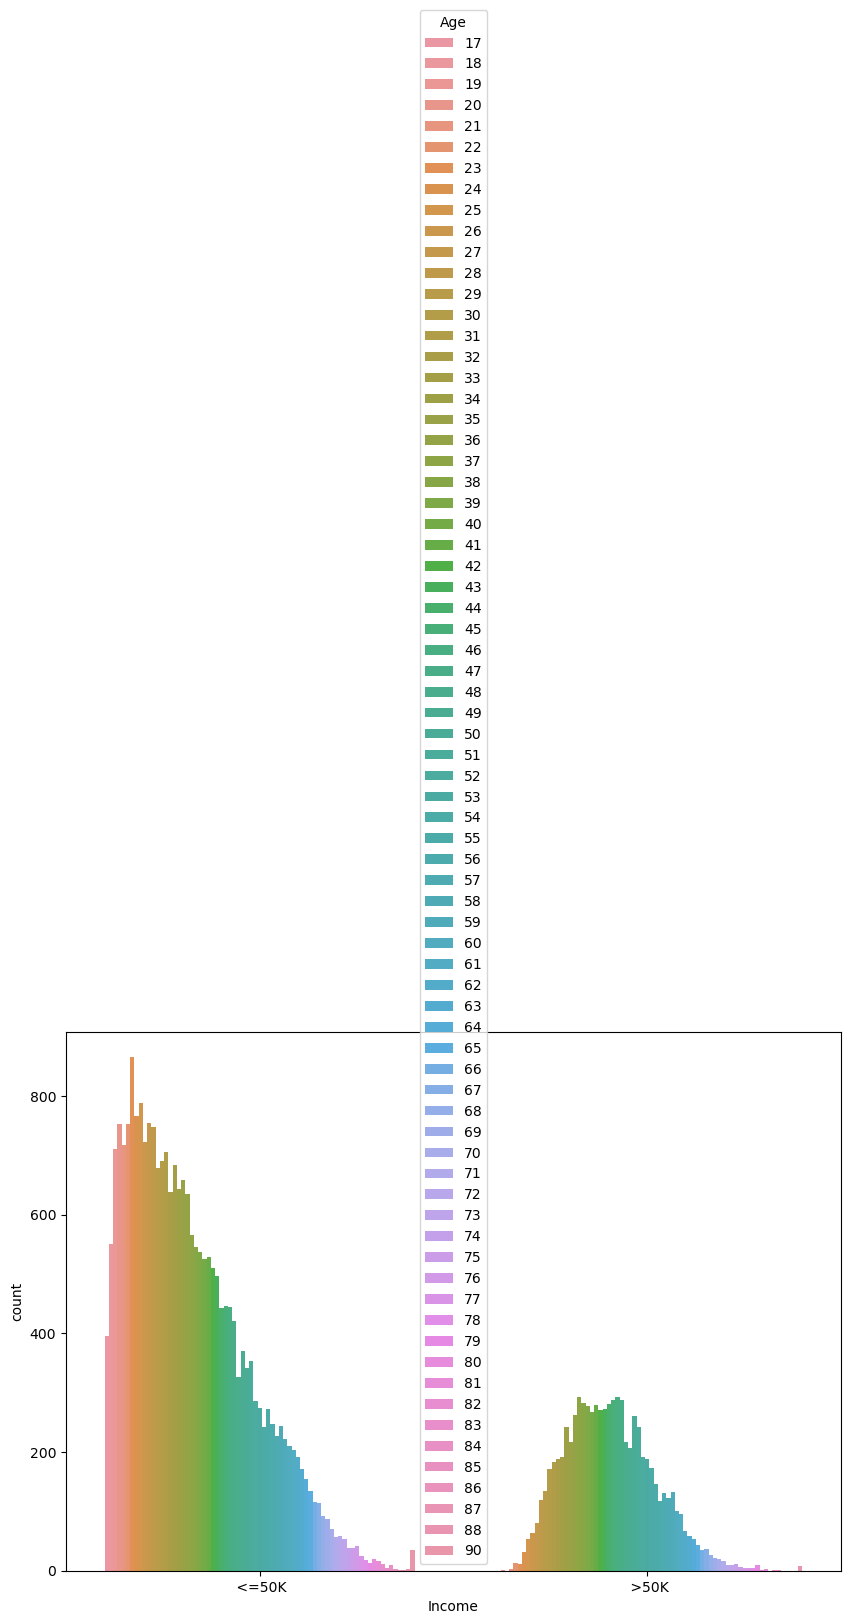

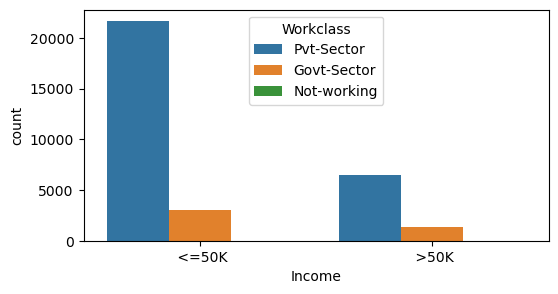

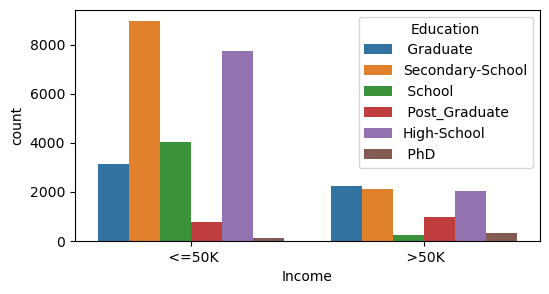

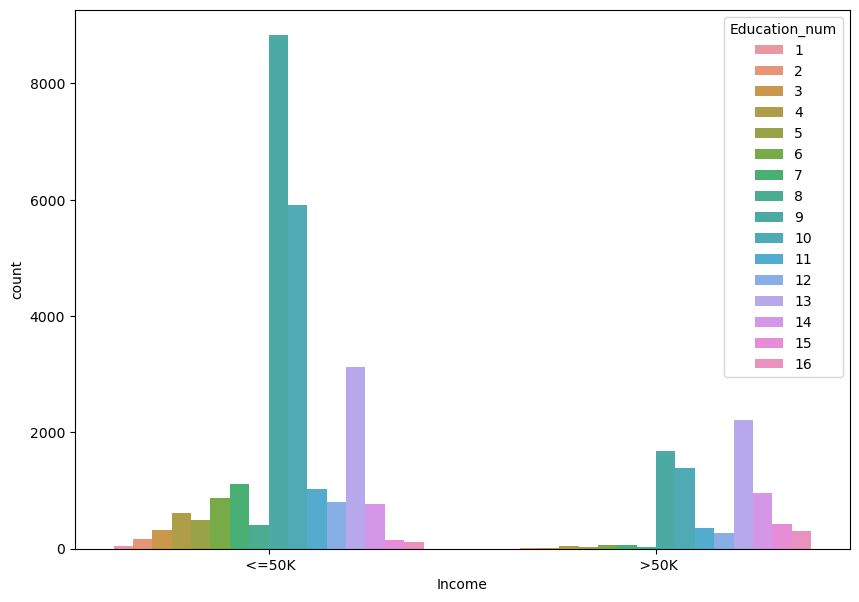

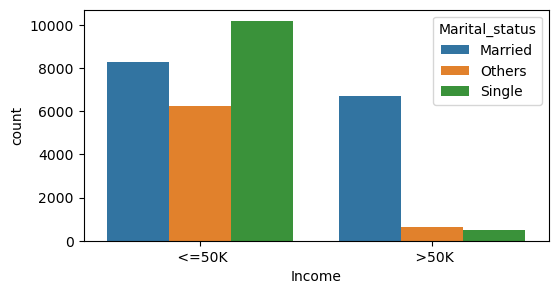

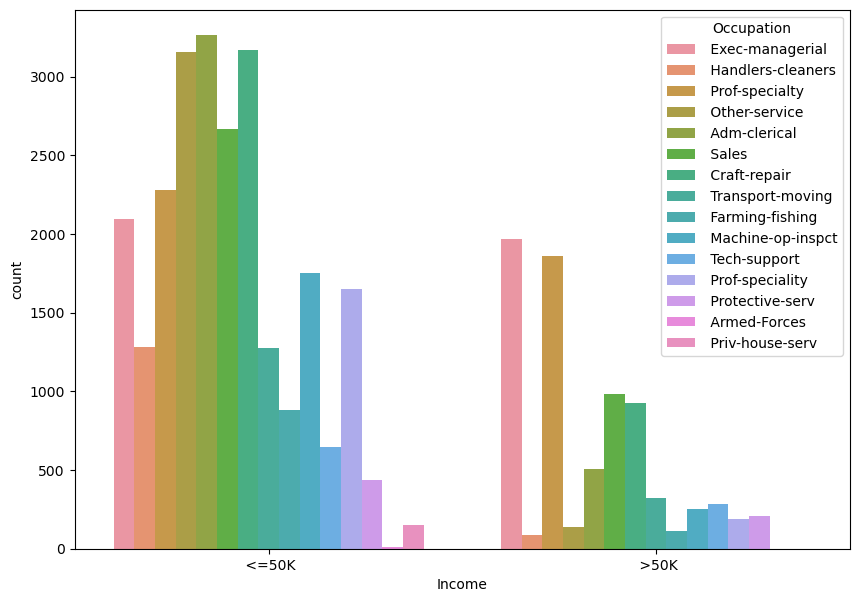

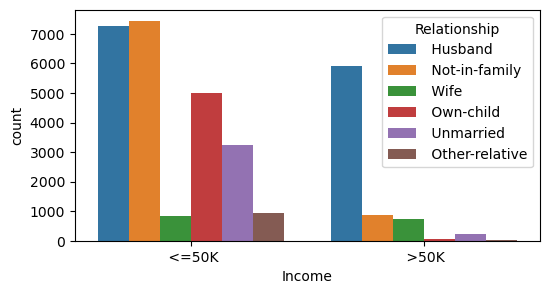

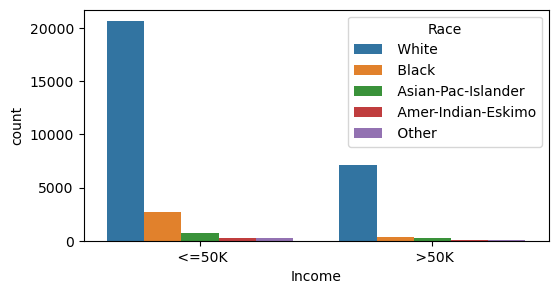

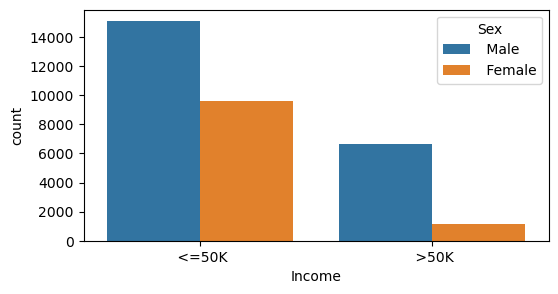

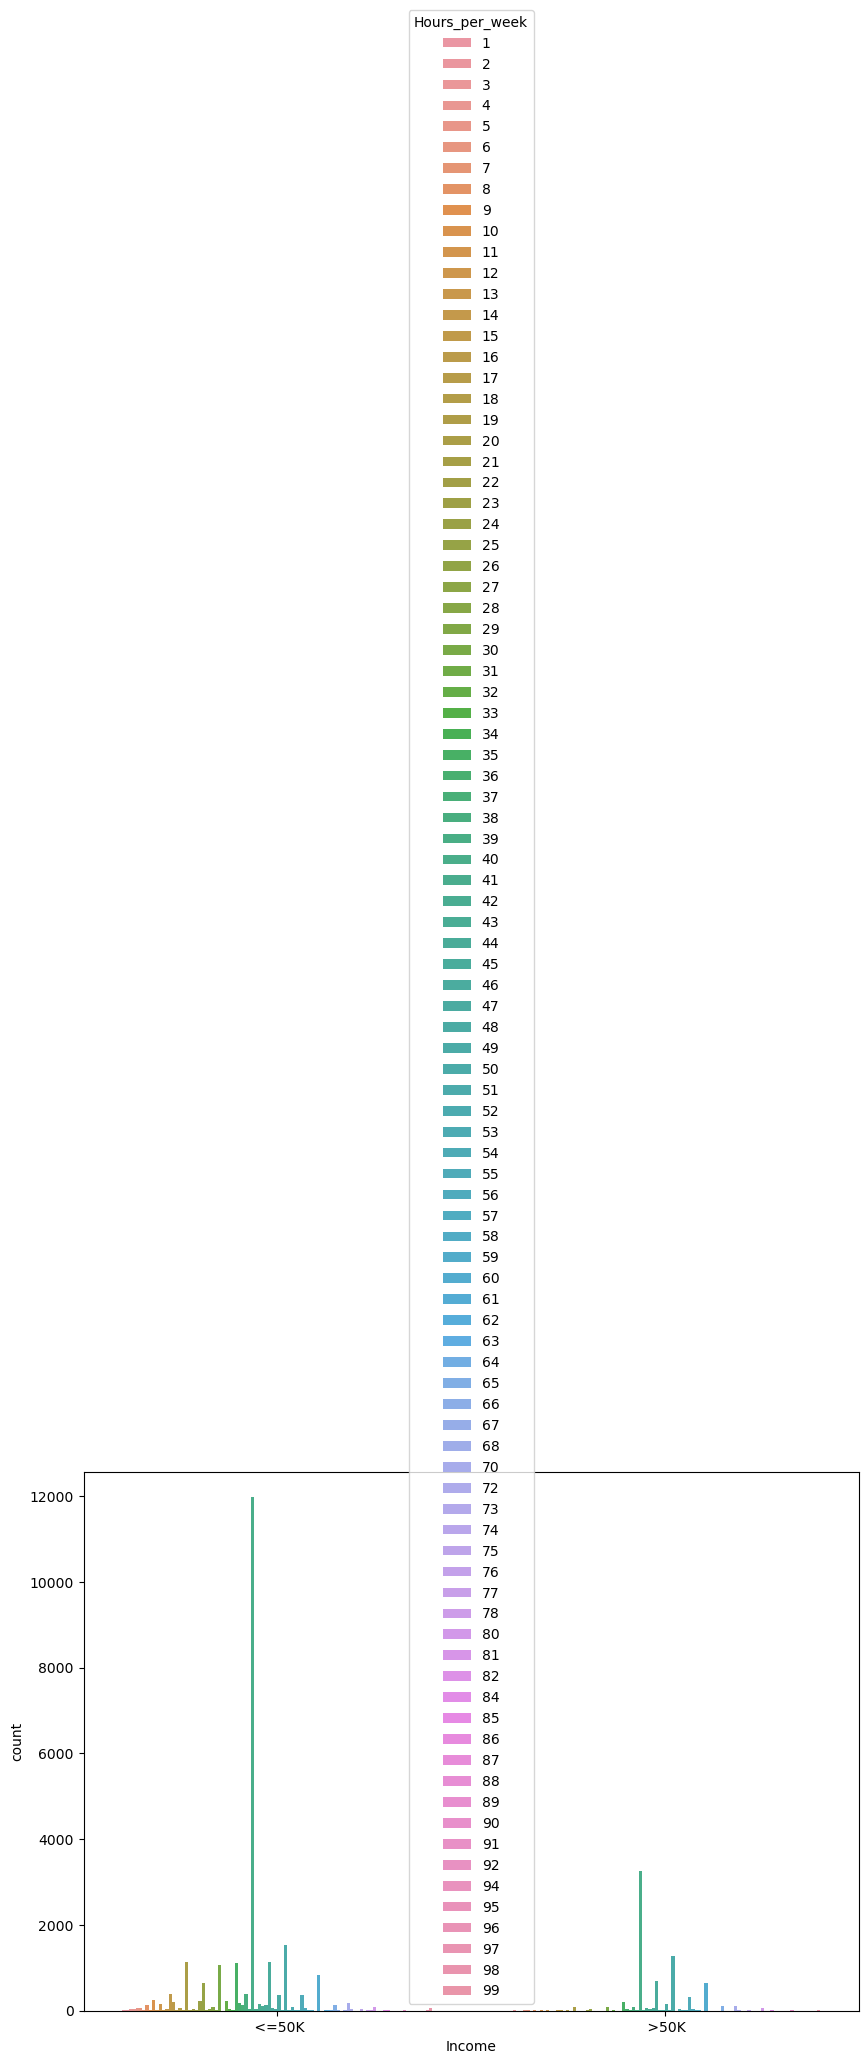

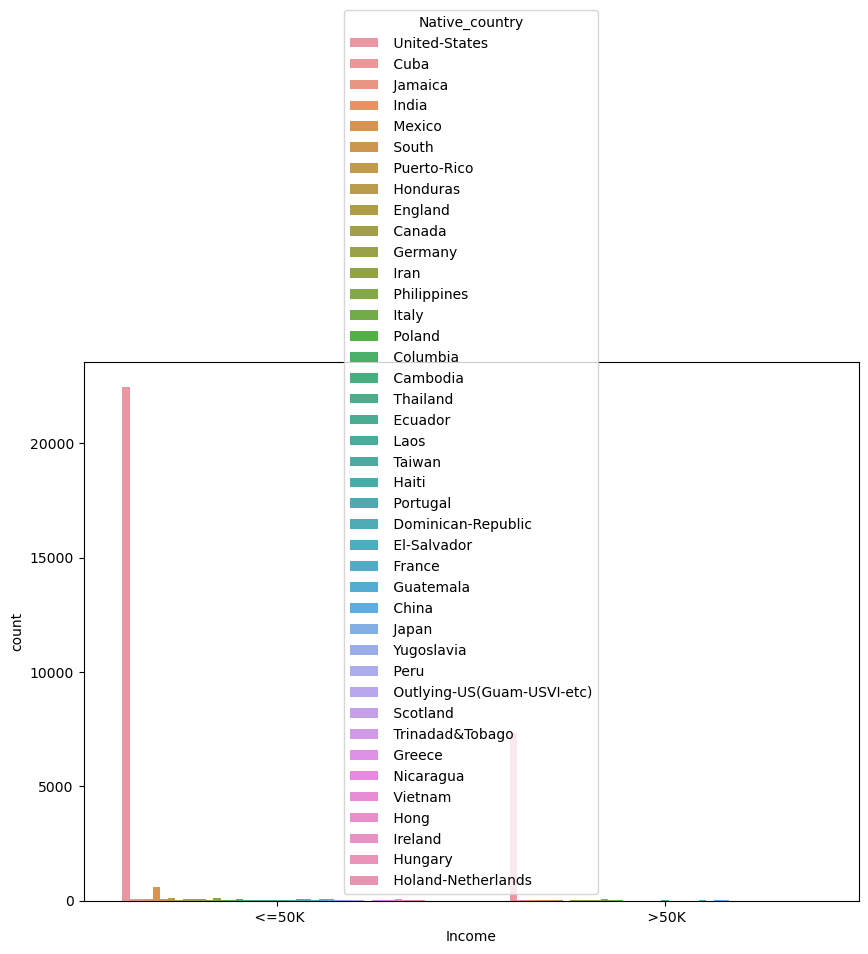

In [46]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x = 'Income', data = df, hue = 'Age')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Income', data = df, hue = 'Workclass')
plt.show()


plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Income', data = df, hue = 'Education')

plt.show()
plt.figure(figsize=(10, 7))
ax = sns.countplot(x = 'Income', data = df, hue = 'Education_num')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Income', data = df, hue = 'Marital_status')
plt.show()

plt.figure(figsize=(10, 7))
ax = sns.countplot(x = 'Income', data = df, hue = 'Occupation')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Income', data = df, hue = 'Relationship')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Income', data = df, hue = 'Race')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Income', data = df, hue = 'Sex')
plt.show()

plt.figure(figsize=(10, 7))
ax = sns.countplot(x = 'Income', data = df, hue = 'Hours_per_week')
plt.show()

plt.figure(figsize=(10, 7))
ax = sns.countplot(x = 'Income', data = df, hue = 'Native_country')
plt.show()

1> In Education columns less than 50 earn by the secondrary school people after than High school people.

In Education columns more than 50 earn by the Graduate people after than High school people.

2> In Work class column Pvt.sector pepole earn <= 50k and above >50k.

3> In Martial status single pepole earn <= 50k followed by married and others.

also the eople who married they can earn >50k followed by others.

4> In Relationship column not in family earn <=50k followed by Husband and own child.

also Husband Can earn more than 50K in relationship followed by not in family.

5> In Race column Whhite can earm<= 50k followed by the black

also in white can ear more than 50 k plus.

6> in sex both bar has clarly shows that men can earn <= 50k and > 50k


In [47]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

# Histogram

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

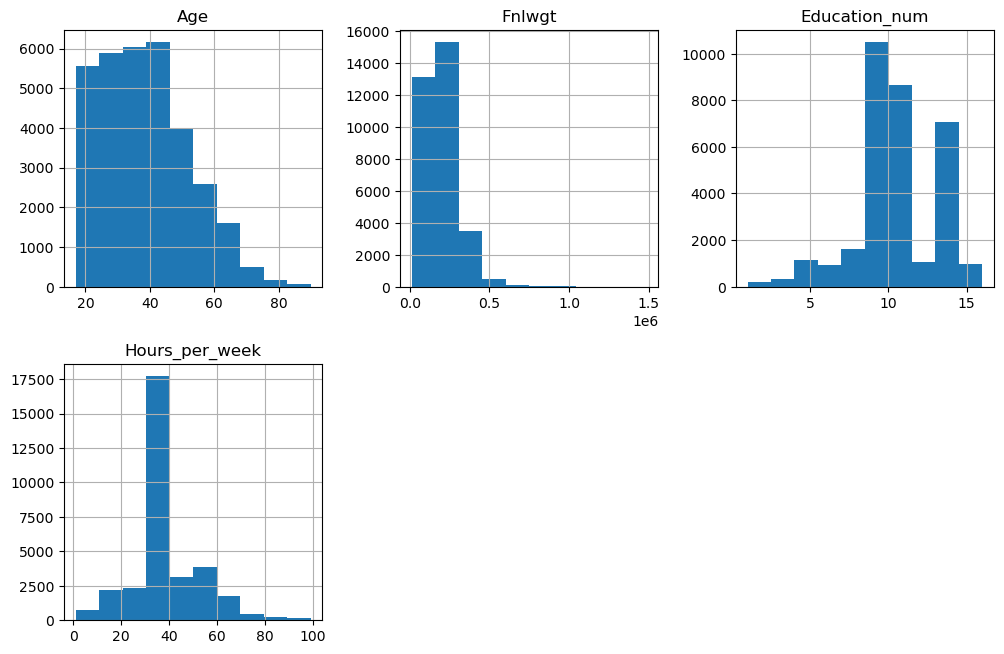

In [48]:
df.hist(figsize = (12,12), layout = (3,3), sharex = False)

 the hist graph shows
 
1. The Age of the people is between 17 to 50

2. Education num is betwwen 9 to 12

3. most of the people can work 30 to 40 hr weekly.

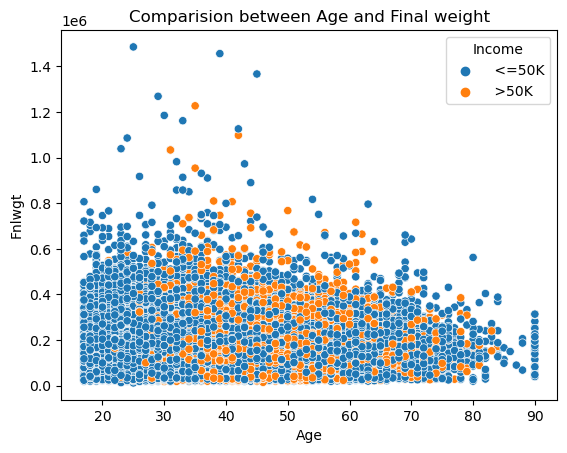

In [49]:
# visualizing how the income changes with work class of the people
sns.scatterplot(x='Age',y='Fnlwgt', data=df,hue='Income');
plt.title('Comparision between Age and Final weight')
plt.show()

The people's age between 17-80 with average final weight have income <=50k


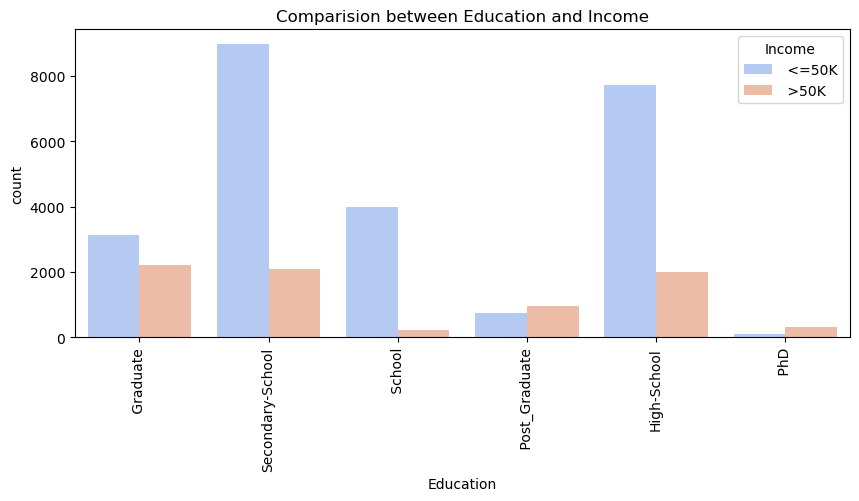

In [50]:
# visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,4))
sns.countplot(df['Education'],hue=df['Income'],palette= "coolwarm")
plt.title('Comparision between Education and Income')
plt.xticks(rotation=90)
plt.show()

The people who completed there high school have income <=50k followed by the people who done their Secondary School .
Also the people who done their Graduatuion they are earning more income that is >50k

<Figure size 1000x600 with 0 Axes>

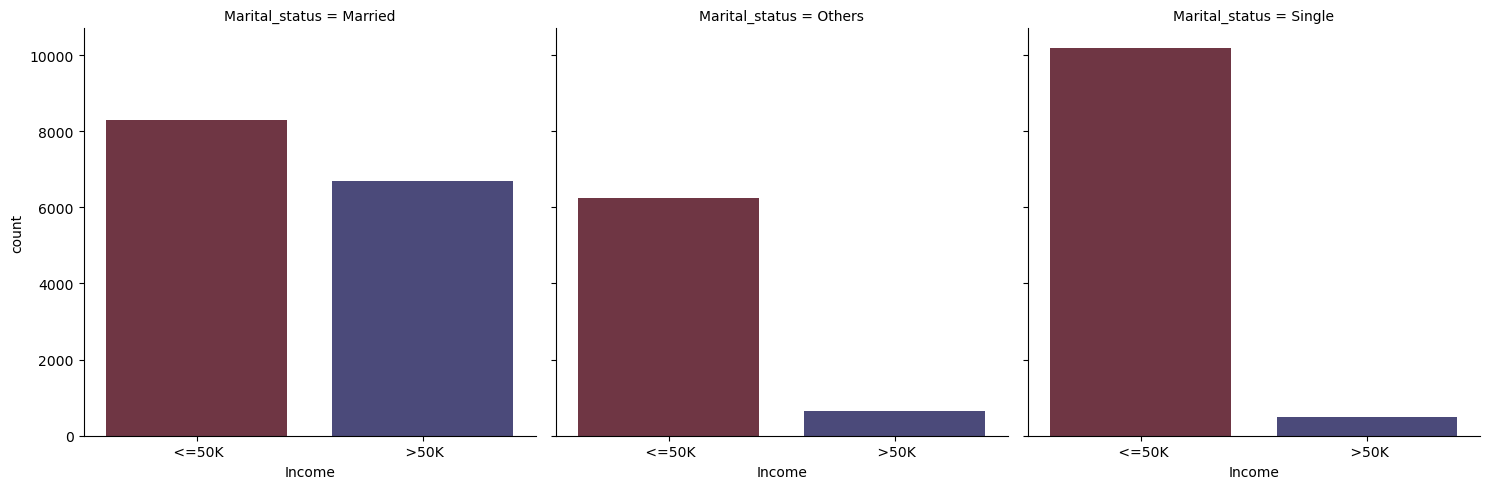

In [51]:
# visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income', col='Marital_status',data=df,kind='count',palette='icefire_r')
plt.show()

The people who are married they have the income >50k compare to others.
The people who are staying singles earning <=50k income.

# Color Palette
supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

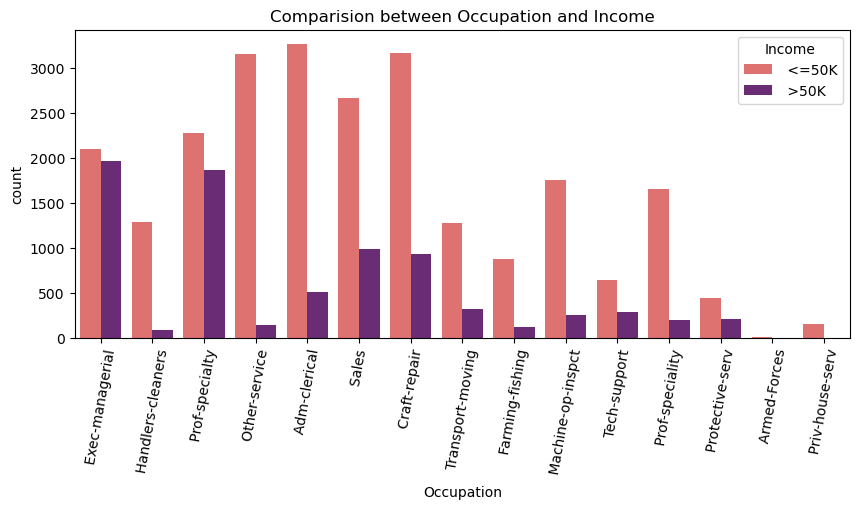

In [52]:
# visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,4))
sns.countplot(df['Occupation'],hue=df['Income'],palette='magma_r')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=80)
plt.show()

The people in the position Prof-speciality and Exce-managerial have the income more than 50k
Also the people who are in the position Prof_Speciality, Other sevices, Adm-clerical and craft repair they have income less than 50k

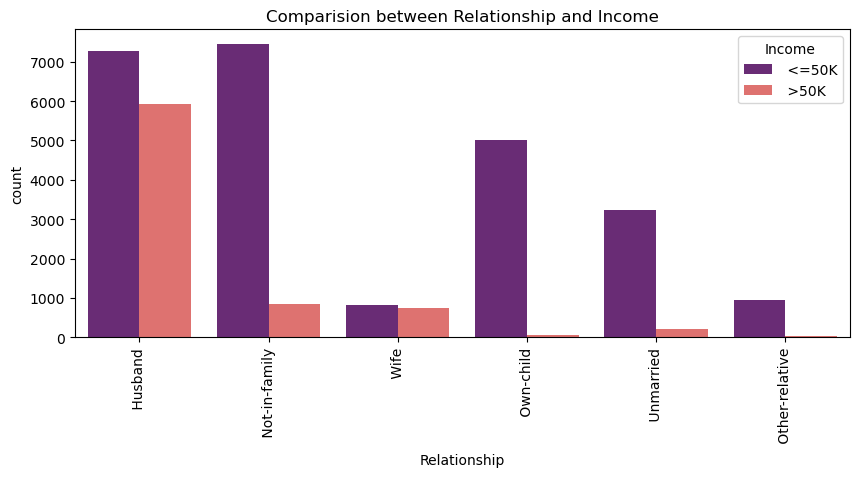

In [53]:
# visualizing the relation between Relationship and Income of the people
plt.figure(figsize=(10,4))
sns.countplot(df['Relationship'],hue=df['Income'],palette='magma')
plt.title('Comparision between Relationship and Income')
plt.xticks(rotation=90)
plt.show()

People who have the relationship of husband and wife have income >50k and the others relationship giving income <=50k

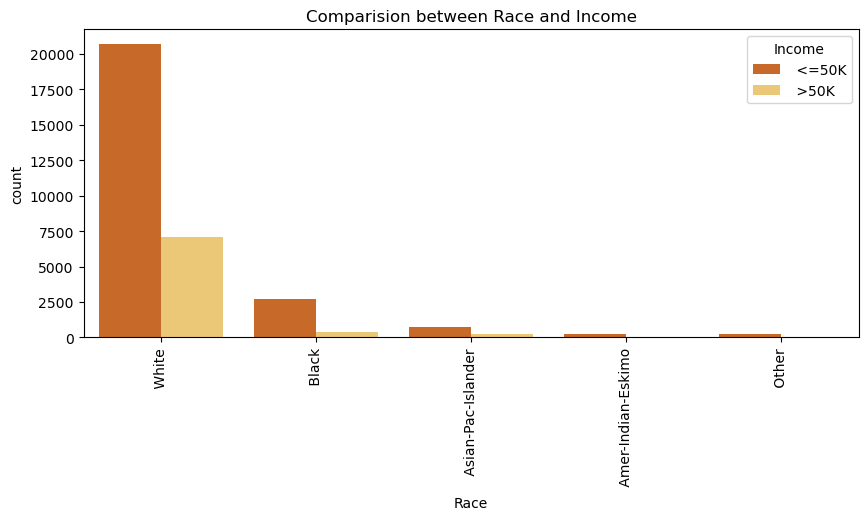

In [54]:
# visualizing the relation between Race and Income of the people
plt.figure(figsize=(10,4))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="YlOrBr_r")
plt.title('Comparision between Race and Income')
plt.xticks(rotation=90)
plt.show()

The Graph indicates that The White family groups have high income >50k compare to other groups.

What are the kind options in Catplot?
seaborn.catplot — seaborn 0.12.2 documentation
The kind of plot to draw, corresponds to the name of a categorical axes-level plotting function. Options are: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count

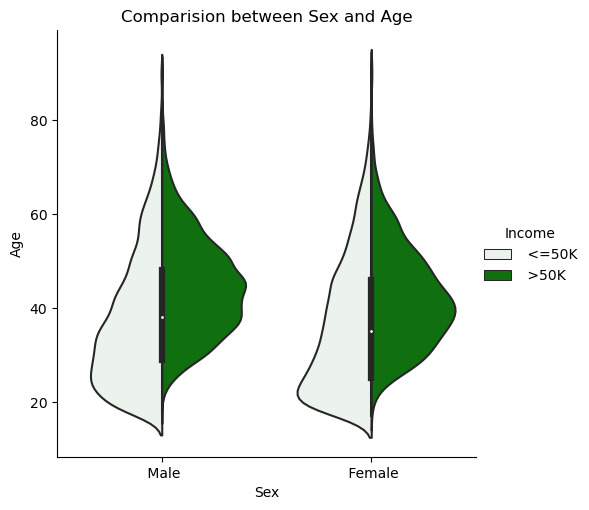

In [55]:
# visualizing the relationship between Sex and Age of the people

sns.catplot(x='Sex',y='Age', kind='violin',color='g',data=df,hue='Income',split=True)
plt.title("Comparision between Sex and Age")
plt.show()


we observe from the Graph
The income of male with age 17-55 have the income >50k compared to the female

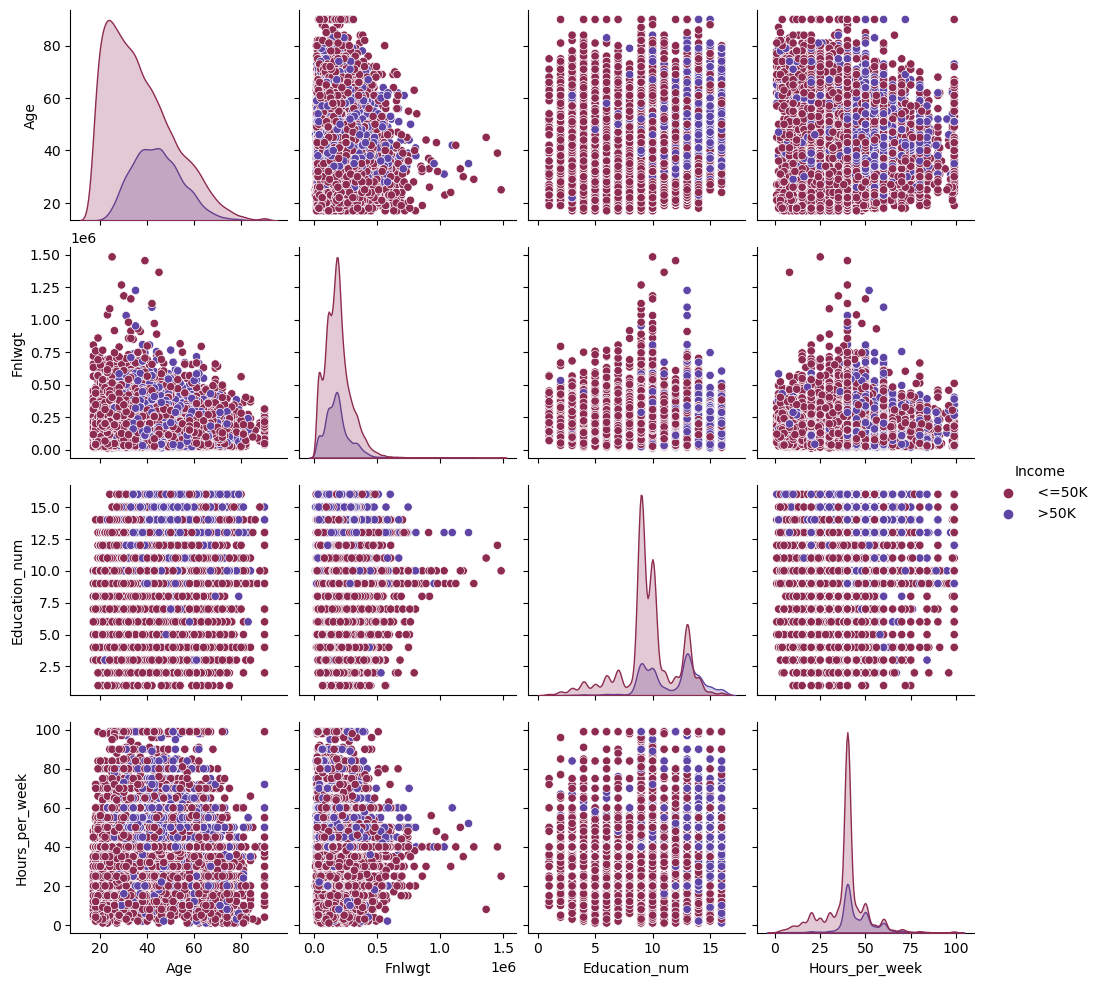

In [56]:
# checking the pairwise relation in the dataset.
sns.pairplot(df,hue='Income',palette='twilight_r')

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Income'. Here we can observe the relation between the features and label.

Most of features are highly correlated with each other.

Some of th efeatures have outliers and skewness , will remove them later

In [57]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Plotting numerical columns

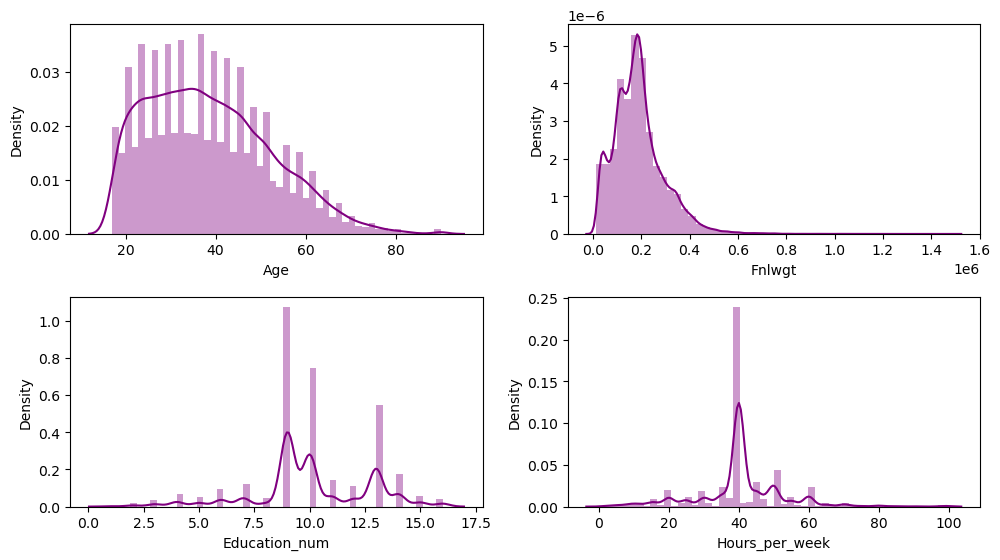

In [58]:
# checking how the data has been distributed in each column

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color='purple')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plot it can be inferred that Age column seems to be normal but the mean is more than the median, so it is skewed to right.

The data is not normal in the above columns and the columns final weight, capital gain an dcapital loss have right skewness since the mean is more in this case.

The data in the columns Education num and Hoursper week are not normal but they have no skewness.

# Outliers Handling

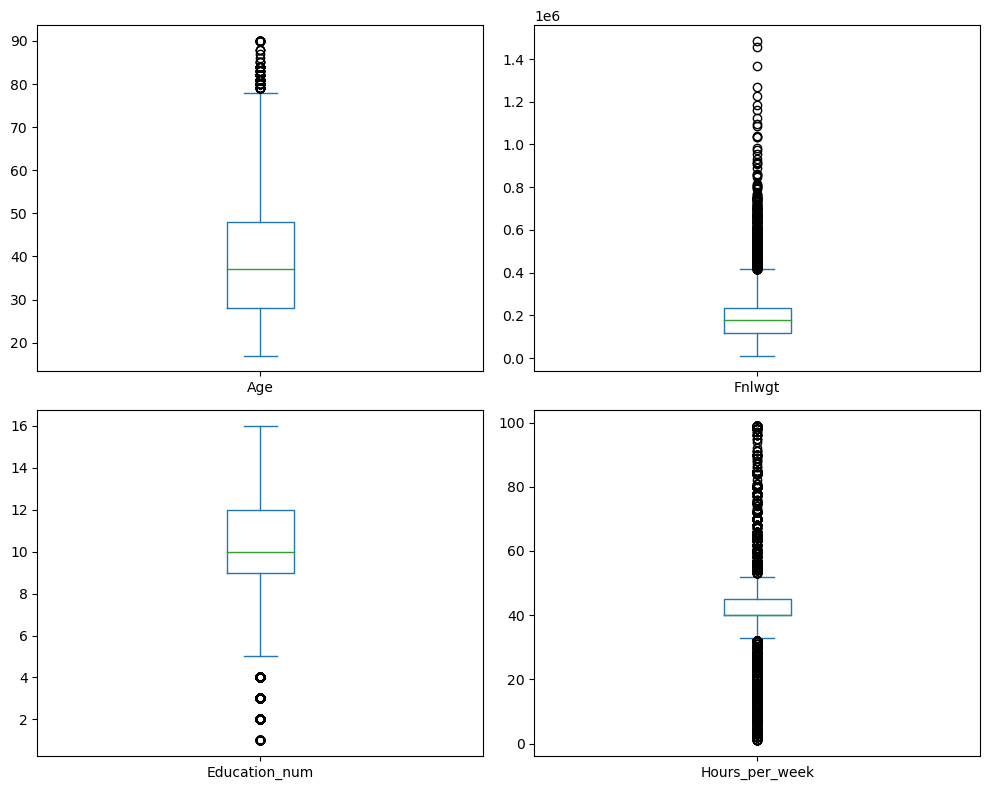

In [59]:
df.plot(kind = 'box',figsize = (10,8), layout=(2,2), sharex = False, subplots = True)
plt.tight_layout()

The outliers present in all the columns we will remove it using 

1. ZSCORE method

2. IQR method


# 1. ZSCORE Method

In [60]:
features = df[['Age','Fnlwgt', 'Education_num', 'Hours_per_week']]
from scipy.stats import zscore
z = np.abs(zscore(features))
z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


Now we have removed the outliers using ZSCORE method

In [61]:
# creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Graduate,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,Secondary-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Graduate,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduate,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


This is the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3

In [62]:
df.shape

(32560, 13)

In [63]:
df1.shape

(31461, 13)

In [64]:
data_loss = ((32560-31461)/32560)*100
data_loss

3.3753071253071254

 Here we are lossing only 3.37 % data using zscore method

# 2. IQR Method

In [65]:
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

IQR=Q3 - Q1

df2 = df[~((df <(Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
df2.shape

(21950, 13)

In [67]:
data_loss = ((32560-21950)/32560)*100
data_loss

32.58599508599509

Here we are losing almost 32 % of data..so we cant go with IQR method

# Checking the skewness

In [68]:
df1.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Fnlwgt has skewness above 0.5

# Removing Skewness

In [69]:
df1['Fnlwgt'] = np.cbrt(df1['Fnlwgt'])

In [70]:
df1.skew()

Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

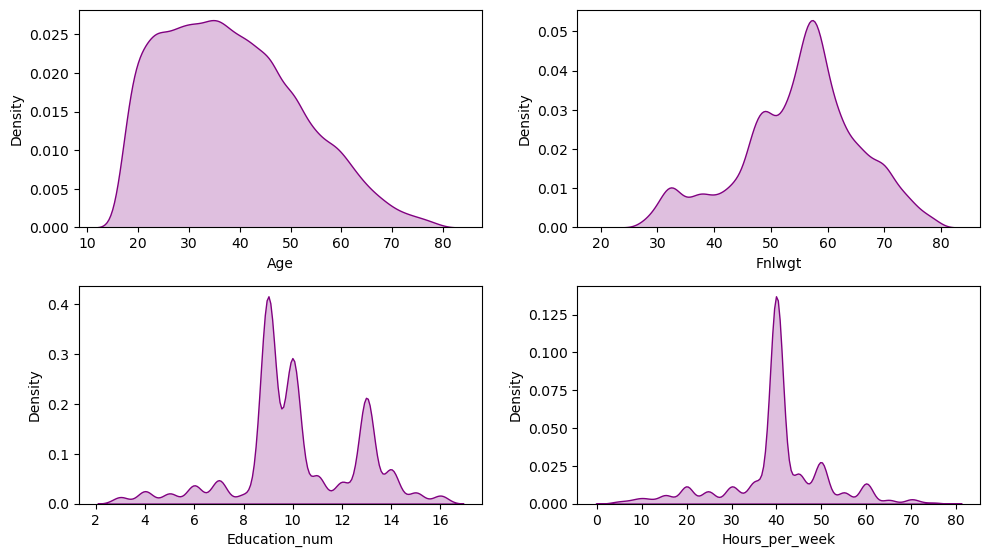

In [71]:
# checking how the data has been distributed in each column

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df1[column], color='purple',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

The data  in Fnlwgt has almost normal and has no skewness

# Encoding the categorical columns using Label Encoding

In [72]:
categorical_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1[categorical_col]= df1[categorical_col].apply(LE.fit_transform)

In [73]:
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,2,43.675121,0,13,0,3,0,4,1,13,38,0
1,38,2,59.967204,5,9,1,5,1,4,1,40,38,0
2,53,2,61.685627,3,7,0,5,0,2,1,40,38,0
3,28,2,69.686283,0,13,0,10,5,2,0,40,4,0
4,37,2,65.776255,2,14,0,3,5,4,0,40,38,0


# Correlation between the Label and Features using HEAT map

In [74]:
cor = df1.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083976,-0.062328,-0.037634,0.053361,-0.476050,0.001946,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083976,1.000000,0.021537,0.099495,-0.160112,0.033947,-0.008097,-0.001453,0.052175,0.036279,-0.004063,-0.032302,-0.061518
Fnlwgt,-0.062328,0.021537,1.000000,0.007303,-0.031874,0.030462,0.001691,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.037634,0.099495,0.007303,1.000000,-0.523081,0.024449,-0.100839,0.078420,-0.014485,-0.027985,-0.074764,0.034600,-0.216612
Education_num,0.053361,-0.160112,-0.031874,-0.523081,1.000000,-0.071406,0.098277,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.033947,0.030462,0.024449,-0.071406,1.000000,-0.005145,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,0.001946,-0.008097,0.001691,-0.100839,0.098277,-0.005145,1.000000,-0.043123,-0.000541,0.048611,-0.008645,-0.001080,0.048110
Relationship,-0.268028,-0.001453,0.009060,0.078420,-0.102497,0.451130,-0.043123,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.052175,-0.006959,-0.014485,0.030849,-0.081701,-0.000541,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036279,0.023307,-0.027985,0.016662,-0.336209,0.048611,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


<AxesSubplot:>

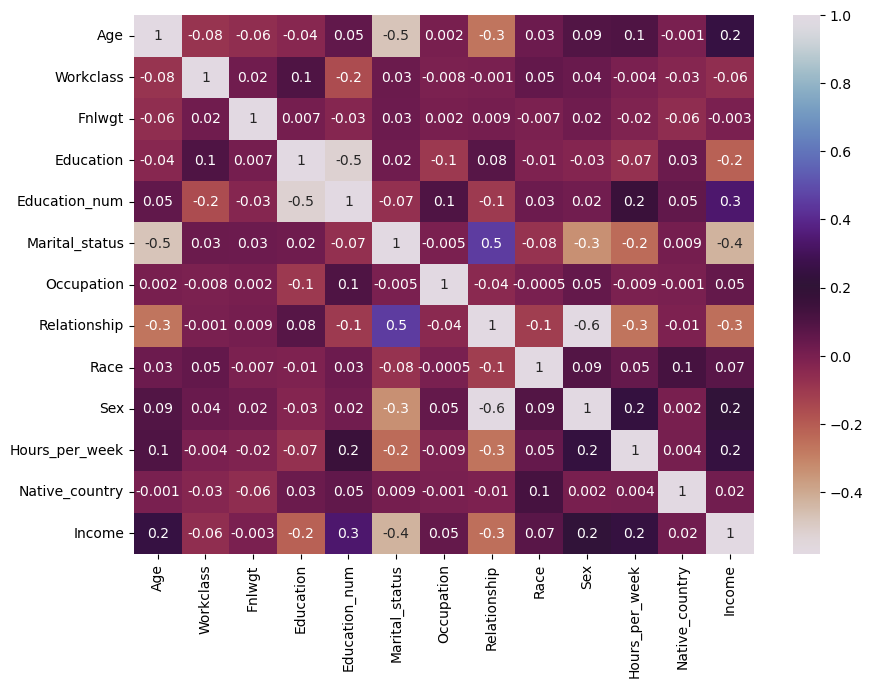

In [75]:
plt.figure(figsize = (10,7))
sns.heatmap(df1.corr(),fmt='.1g', annot = True, linecolor='black',annot_kws={'size':10},cmap='twilight_r')

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlaion

There is no much correlation between the target and the label
.
The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target
.
The columns Marital status and Relationship have less correlation with the label.

The columns Relationship and Sex are highly correlated with each other also the columns Fnlwgt has very less relation with the label so we can drop these columns if necessary.

In [76]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.048110
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.061518
Education        -0.216612
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

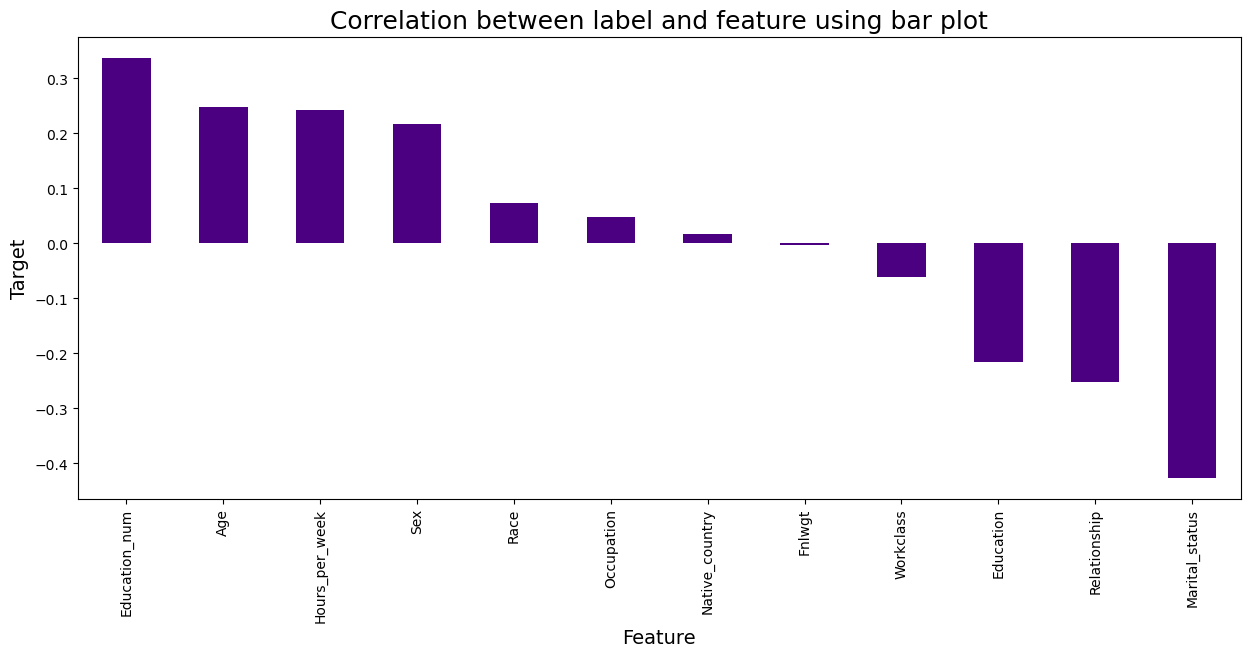

In [77]:
plt.figure(figsize=(15,6))
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [78]:
df.drop( 'Fnlwgt', axis = 1, inplace = True) 

# Separating the features and label variables into x and y

In [79]:
x = df1.drop('Income', axis=1)
y = df1['Income']

In [80]:
x.shape

(31461, 12)

In [81]:
y.shape

(31461,)

In [82]:
x.skew()

Age               0.472279
Workclass        -2.129075
Fnlwgt           -0.376609
Education        -1.003678
Education_num    -0.159752
Marital_status    0.254255
Occupation        0.091529
Relationship      0.777721
Race             -2.453934
Sex              -0.708658
Hours_per_week   -0.341724
Native_country   -4.362026
dtype: float64

Skewness optimum level is +/-0.50. Here there are few columns more than optimum limit so they are skewed.

The following columns(Workclass,Education,Marital_status,Relationship,Race,sex and Native_country) have skewness more than +/-0.5 . others fectors are out of range so no need to remove skewness in these columns.

we use power tranformation to stablize the variance. make the data more normal disrtibution like Box-cox - This is use only positive values( > 0 )..not work on zero also Yeo-Johnson - This works on both positive and negative values

so in our mwthod we use Yeo-Johnson method

In [83]:
from sklearn.preprocessing import PowerTransformer

# lets make a list of columns with skewness
skew=['Workclass','Education','Marital_status','Relationship','Race','Sex', 'Native_country']

# lets execute
scaler = PowerTransformer (method='yeo-johnson')

In [84]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew]

,Workclass,Education,Marital_status,Relationship,Race,Sex,Native_country
0,0.396596,-1.754941,-1.041799,-1.096842,0.410426,0.706601,0.285693
1,0.396596,1.031282,0.411420,0.127310,0.410426,0.706601,0.285693
2,0.396596,-0.459850,-1.041799,-1.096842,-2.446307,0.706601,0.285693
3,0.396596,-1.754941,-1.041799,1.546924,-2.446307,-1.415226,-3.503012
4,0.396596,-1.025898,-1.041799,1.546924,0.410426,-1.415226,0.285693
...,...,...,...,...,...,...,...
32555,0.396596,0.227893,-1.041799,1.546924,0.410426,-1.415226,0.285693
32556,0.396596,1.031282,-1.041799,-1.096842,0.410426,0.706601,0.285693
32557,0.396596,1.031282,0.411420,1.347720,0.410426,-1.415226,0.285693
32558,0.396596,1.031282,1.187789,1.085808,0.410426,0.706601,0.285693


In [85]:
# Lets check the skewness again
x.skew()

Age               0.472279
Workclass        -2.125027
Fnlwgt           -0.376609
Education        -0.628556
Education_num    -0.159752
Marital_status    0.048306
Occupation        0.091529
Relationship      0.120101
Race             -2.027779
Sex              -0.708658
Hours_per_week   -0.341724
Native_country   -3.073090
dtype: float64

Tried removing the skewness but its not removing completely

# Feature Scaling using Standard Scalarization

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.396596,-1.102052,-1.754941,1.154324,-1.041799,-0.792500,-1.096842,0.410426,0.706601,-2.424121,0.285693
1,-0.025350,0.396596,0.464976,1.031282,-0.459657,0.411420,-0.334828,0.127310,0.410426,0.706601,-0.008364,0.285693
2,1.100158,0.396596,0.630260,-0.459850,-1.266647,-1.041799,-0.334828,-1.096842,-2.446307,0.706601,-0.008364,0.285693
3,-0.775689,0.396596,1.399791,-1.754941,1.154324,-1.041799,0.809353,1.546924,-2.446307,-1.415226,-0.008364,-3.503012
4,-0.100384,0.396596,1.023711,-1.025898,1.557819,-1.041799,-0.792500,1.546924,0.410426,-1.415226,-0.008364,0.285693
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.396596,0.814728,0.227893,0.750829,-1.041799,1.495862,1.546924,0.410426,-1.415226,-0.187309,0.285693
31457,0.124718,0.396596,-0.143169,1.031282,-0.459657,-1.041799,-0.105992,-1.096842,0.410426,0.706601,-0.008364,0.285693
31458,1.475327,0.396596,-0.170768,1.031282,-0.459657,0.411420,-1.479009,1.347720,0.410426,-1.415226,-0.008364,0.285693
31459,-1.225892,0.396596,0.335900,1.031282,-0.459657,1.187789,-1.479009,1.085808,0.410426,0.706601,-1.797814,0.285693



# Oversampling

In [87]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE()
x,y = sm.fit_resample(x,y)

In [88]:
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

# VIF(Variance Inflation Factor):

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.266341,Age
1,1.037697,Workclass
2,1.010050,Fnlwgt
3,1.463896,Education
4,1.581541,Education_num
5,2.118385,Marital_status
6,1.022581,Occupation
7,3.163426,Relationship
8,1.069137,Race
9,1.975818,Sex


all the value is liss than 10 we are free from collinearity

# Modeling

# finding best Random state

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc =accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.839854667411962  on Random_state  162


The best accuracy is 83.98% on the Random State 137

# Creating train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state= 137)

In [92]:
# Classification Algorithm

In [93]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [94]:
model=[DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier(),RandomForestClassifier(),
      KNeighborsClassifier(),LogisticRegression()]
for m in model:
    print("-------------------------------------------------------------")
    print('accuracy score of : ',m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    
    print("Accuracy Score:--> " , accuracy_score(y_test,pred))
    print("comfusion matrix:--> ",confusion_matrix(y_test,pred))
    print("classifcation Report:--> ",classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    
    print("Cross Validation Score:  ",score.mean())
    print("Difference between Accuracy score and CrossA Validation Score is :  ", accuracy_score(y_test,pred)-abs(score.mean()))
    print("----------------------------------------------------------------")

-------------------------------------------------------------
accuracy score of :  DecisionTreeClassifier()
Accuracy Score:-->  0.8296534376746786
comfusion matrix:-->  [[5835 1301]
 [1137 6039]]
classifcation Report:-->                precision    recall  f1-score   support

           0       0.84      0.82      0.83      7136
           1       0.82      0.84      0.83      7176

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312

[0.74502201 0.79823918 0.86846243 0.87779059 0.87653286]
Cross Validation Score:   0.833209411549985
Difference between Accuracy score and Cross Validation Score is :   -0.003555973875306373
----------------------------------------------------------------
-------------------------------------------------------------
accuracy score of :  AdaBoostClassifier()
Accuracy Score:-->  0.8389463387367244
comfusion matrix:-->  [[5711 1425]
 [ 880 6296]]
cla

DecisionTreeClassifier -    83.35 %

AdaBoostClassifier -        82.88 %

GradientBoostingClassifier -84.63 %

ExtraTreesClassifier -      89.15 %

RandomForestClassifier -    88.02 %
      
KNeighborsClassifier -      84.84 %
    
LogisticRegression -        79.85%

From the difference between the accuracy score and the CV score we can conclude that Extra Tree Classifier as our best model.

# Hyper Parameter Tuning

In [95]:
parameters = {'criterion': ['gini','entropy'], 
              'random_state': [10,50,1000], 
              'max_depth':[0,10,20],
              'n_jobs':[-2,-1,1], 
              'n_estimators': [50,100,200,300]}

In [96]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [112]:
# GCV.fit(x_train, y_train)
# it taking too much time thats why we stop this and randmoly take some parmeters

In [111]:
final_model = ExtraTreesClassifier(criterion = 'gini',
 max_depth = 50,
 n_estimators = 600,
 n_jobs = 15,
 random_state = 1000)

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

88.70178870877585


The acuaracy afetr the hyper parameter its same 89%

In [113]:
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

# AUC ROC Curve

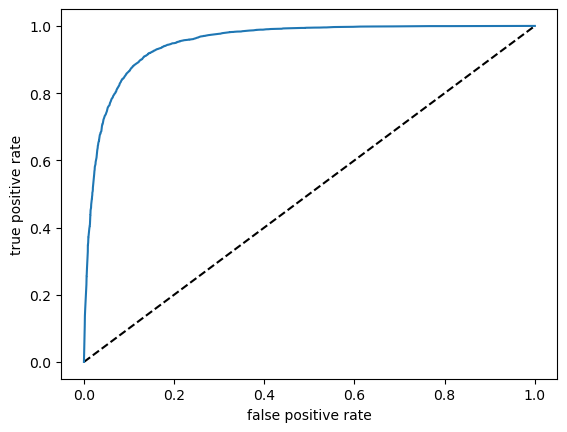

Auc score:   
 0.8869269794431862


In [117]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label = 'Extra Tree Classifier(area = %0.2f)'% roc_auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

auc_score = roc_auc_score(y_test, final_model.predict(x_test))
print('Auc score: ', '','\n', auc_score)

This is one of the performance parameter. IT IS USE roc FOR BINARY classification problem. so you cannot use for multiclass classifiaction. it creates probablity curve tPR against the fpr as va threshold. it seperate the signal eom the noise. AUC that use to masure the ability of your binary classifier to distingwish between the classes. also give summary of a roc curve [:, 1] there are two classes so we are selecting one of them.

false postive rate-> Basically FPR tells us what proportion of negative class got in correctly classified by the classifier.

True positive rate ---> Reacall/ sensitivity

so higher the auc score / value better the performance of model and our modeling is your classifier is able to distingwwish between positive ad negative classes. range is 0 to 1 it it is 1 -> classifier is correctely distingwish between the classes. if it is 0 --> classifier is not perfectly classify between the classes. 0.5---------> not bale to distinwish between thr two classes

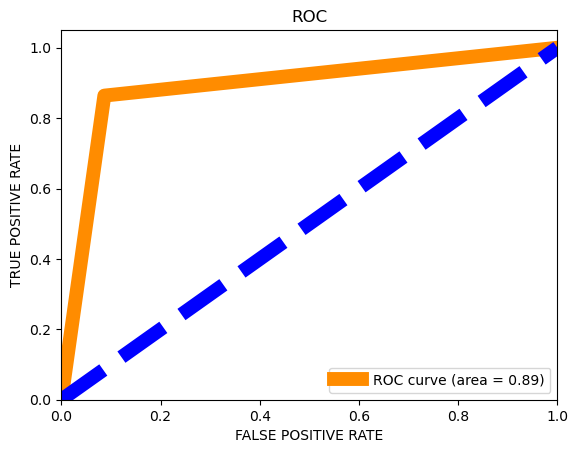

In [115]:
fpr,tpr,threshold = roc_curve(pred, y_test)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color = 'blue', lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

# saving the model

In [121]:
import joblib
joblib.dump(final_model, "Census_Income.pkl")

['Census_Income.pkl']

In [122]:
model = joblib.load("Census_Income.pkl")
prediction = model.predict(x_test)
prediction

array([1, 0, 1, ..., 0, 1, 1])

In [123]:
a= np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data 

,predicted,original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
14307,1,1
14308,1,1
14309,0,0
14310,1,0


# creating dataframe

In [124]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ["predicted","original"])

In [125]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
predicted,1,0,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
original,1,0,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
